# Regression problem with Deep learning

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import folium
import webbrowser
from folium.plugins import HeatMap

In [2]:
#load the house data
housedata=pd.read_csv("house.csv")
housedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
housedata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [4]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

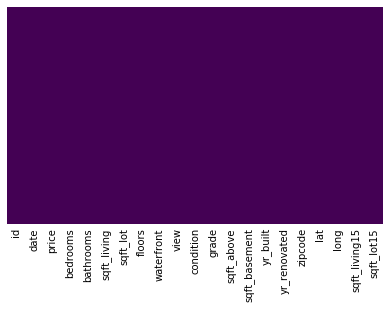

In [5]:
sns.heatmap(housedata.isnull(),yticklabels=False,cbar=False,cmap="viridis")
#we dont have any null values

In [6]:
housedata.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


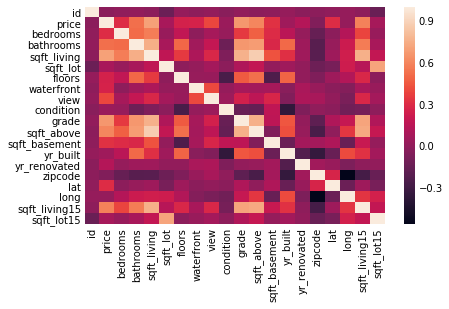

In [7]:
sns.heatmap(housedata.corr(),cmap='rocket',cbar=True,yticklabels=True)

In [8]:
housedata.corr()["price"].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

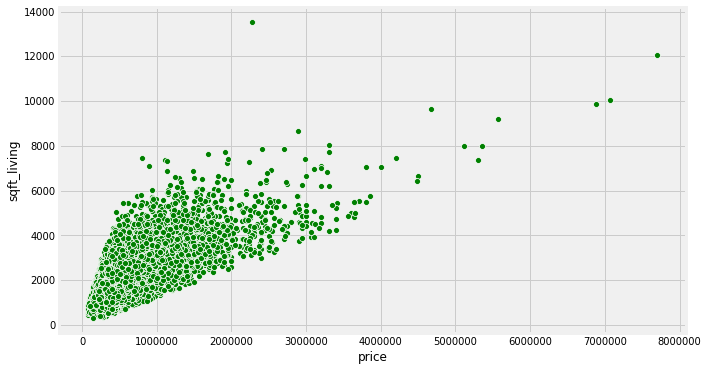

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="sqft_living",data=housedata,color="g",palette='viridis')

Text(0.5, 1.0, 'distribution of sqft_living')

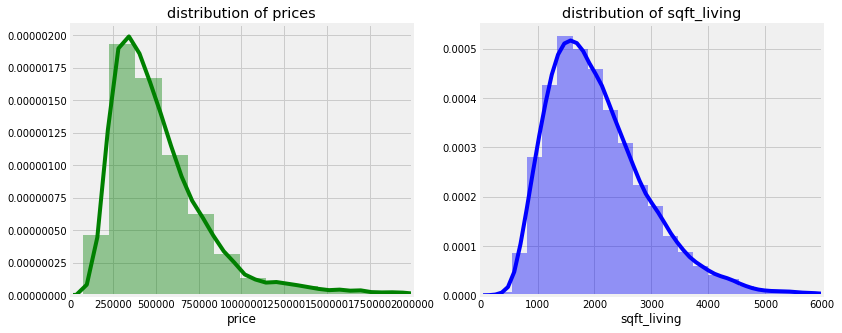

In [10]:
fig=plt.figure(figsize=(12,5))
axis=fig.add_subplot(121)
sns.distplot(housedata['price'],color='g')
plt.ylim(0,None)
plt.xlim(0,2000000)
axis.set_title('distribution of prices')

axis=fig.add_subplot(122)
sns.distplot(housedata['sqft_living'],color='b')
plt.ylim(0,None)
plt.xlim(0,6000)
axis.set_title('distribution of sqft_living')

(0, 6694.8)

<Figure size 720x432 with 0 Axes>

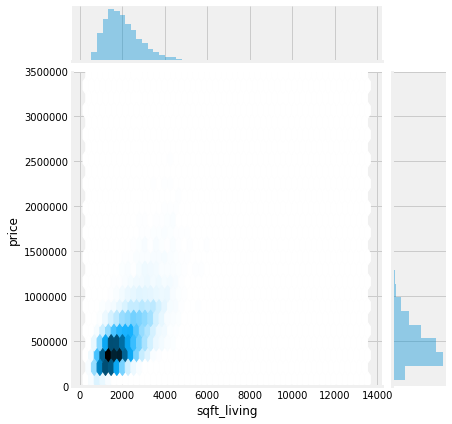

In [11]:
plt.figure(figsize=(10,6))
sns.jointplot(x='sqft_living',y='price',kind='hex',data=housedata)
plt.ylim(0,3500000)
plt.xlim(0,None)

Text(0.5, 1, 'sqft_living vs price')

<Figure size 720x432 with 0 Axes>

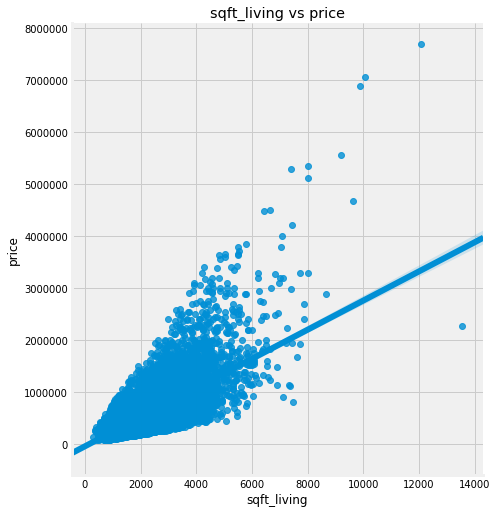

In [12]:
plt.figure(figsize=(10,6))
sns.lmplot(x='sqft_living',y='price',palette='viridis',height=7,data=housedata)
plt.title('sqft_living vs price')

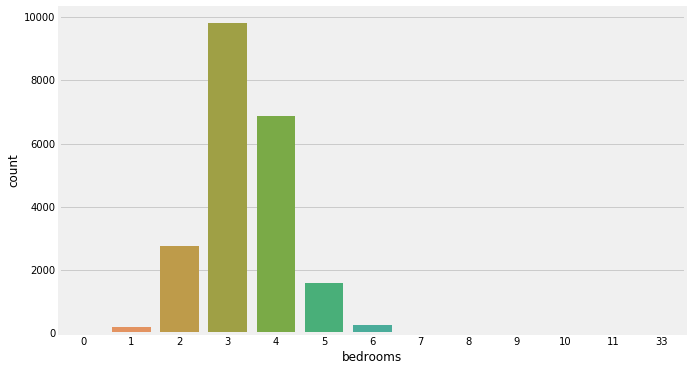

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(housedata["bedrooms"])

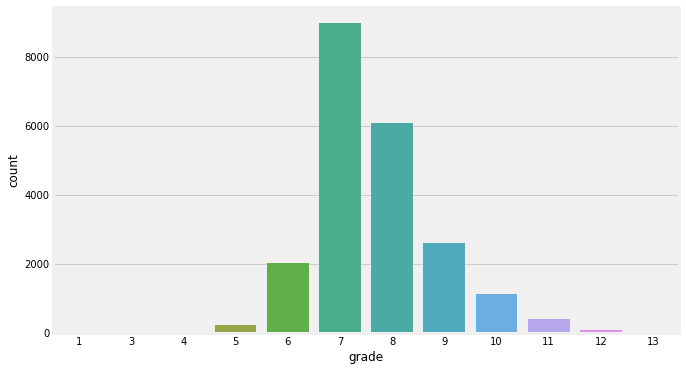

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(housedata["grade"])

Text(0.5, 1.0, 'bedrooms vs price')

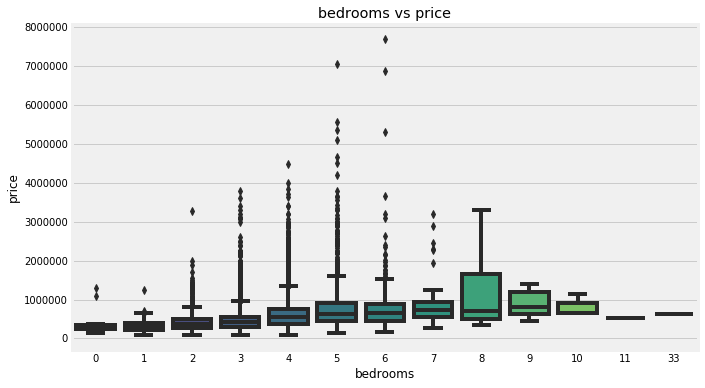

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',palette='viridis',data=housedata)
plt.title("bedrooms vs price")

[(2, 12)]

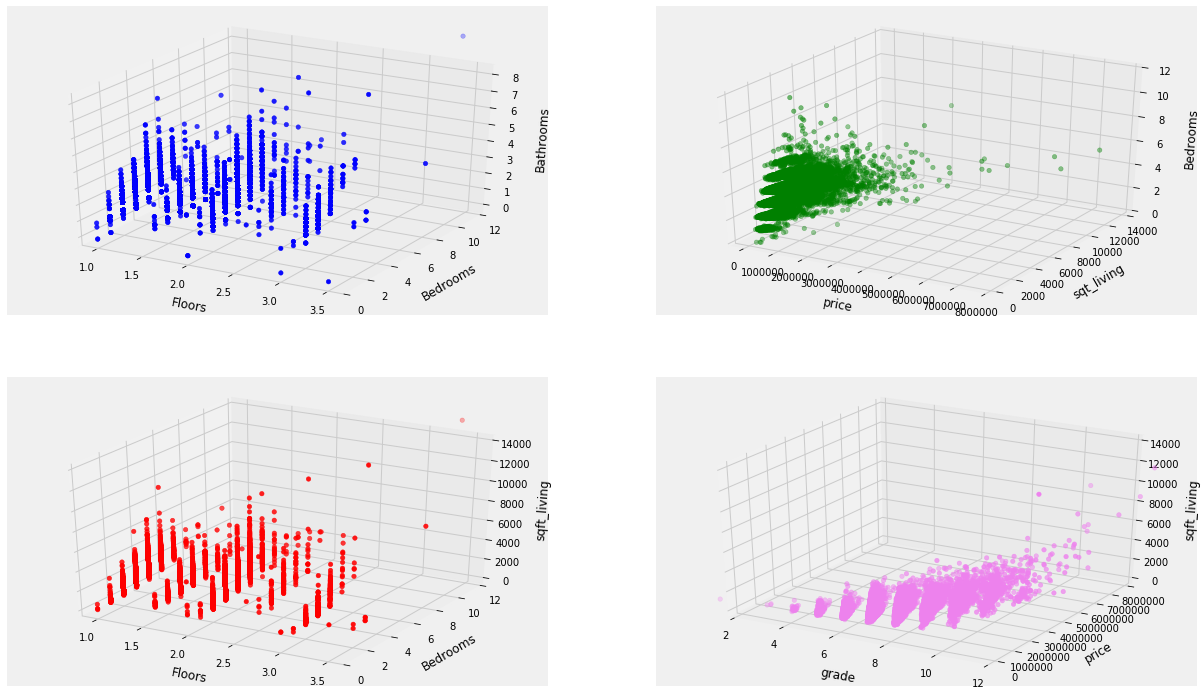

In [16]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(housedata['floors'],housedata['bedrooms'],housedata['bathrooms'],c="blue")
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(housedata['price'],housedata['sqft_living'],housedata['bedrooms'],c="green")
ax.set(xlabel='\nprice',ylabel='\nsqt_living',zlabel='\nBedrooms')
ax.set(zlim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(housedata['floors'],housedata['bedrooms'],housedata['sqft_living'],c="red")
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft_living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(housedata['grade'],housedata['price'],housedata['sqft_living'],c="violet")
ax.set(xlabel='\ngrade',ylabel='\nprice',zlabel='\nsqft_living')
ax.set(xlim=[2,12])

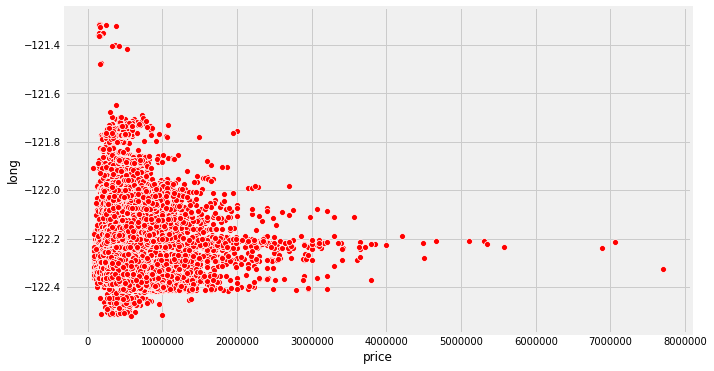

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="long",data=housedata,color="r")

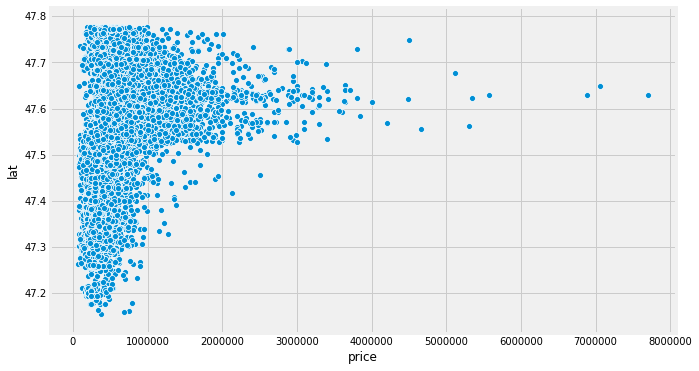

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="lat",data=housedata)

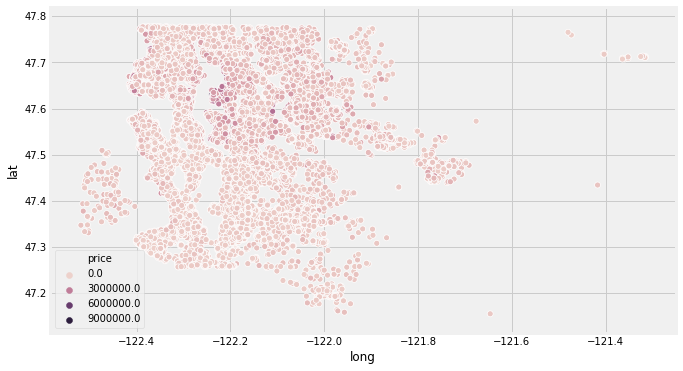

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=housedata,hue="price")

In [20]:
new_data=housedata.sort_values("price",ascending=False).iloc[200:]

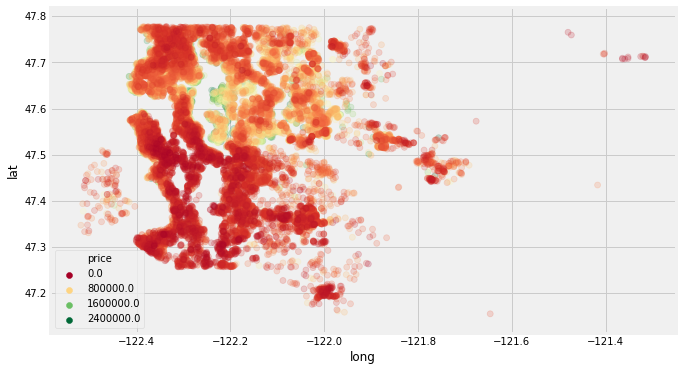

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=new_data,hue="price",palette="RdYlGn",alpha=0.2,edgecolor=None)

In [22]:
latitude=47.6
longitude=-122.3
max_price=housedata.loc[housedata["price"].idxmax()]
dup=housedata.copy()
dup["count"]=1
dup.head()
p="highest price is: $"+str(max_price["price"])
#print(p)
#print(max_price)
def worldmap(location=[latitude,longitude],zoom=9):
    map=folium.Map(location=location,control_state=True,zoom_start=zoom)
    return map
fmap=worldmap()
folium.TileLayer("cartodbpositron").add_to(fmap)
sg=folium.FeatureGroup(name="target").add_to(fmap)
folium.Marker([max_price["lat"],max_price["long"]],
              popup=p,
              icon=folium.Icon(color="red")).add_to(sg)
HeatMap(data=dup[["lat","long","count"]].groupby(["lat","long"]).sum().reset_index().values.tolist(),
       radius=8,max_zoom=13,name='Heat Map').add_to(fmap)
folium.LayerControl(collapsed=False).add_to(fmap)
fmap

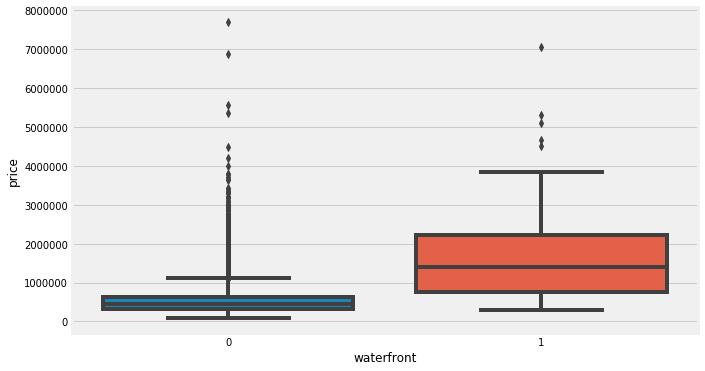

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="waterfront",y="price",data=housedata)

In [24]:
housedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
housedata.drop(['id','zipcode'],axis=1,inplace=True)

In [26]:
housedata["date"].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [27]:
housedata["date"]=pd.to_datetime(housedata["date"])

In [28]:
housedata["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [29]:
housedata["year"]=housedata["date"].apply(lambda date: date.year)
housedata["month"]=housedata["date"].apply(lambda date: date.month)

In [30]:
housedata.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


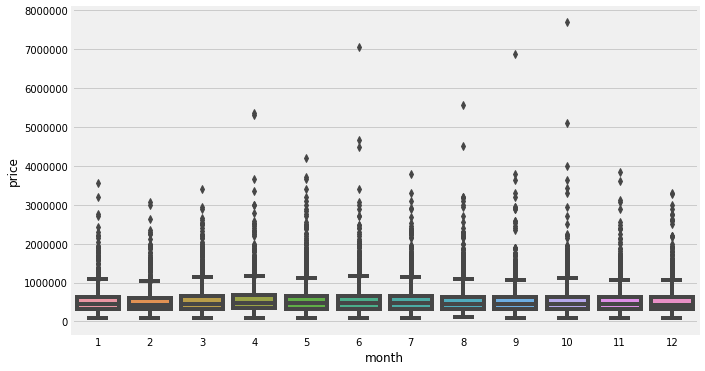

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="month",y="price",data=housedata)

In [32]:
housedata.groupby("month").mean()["price"]

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

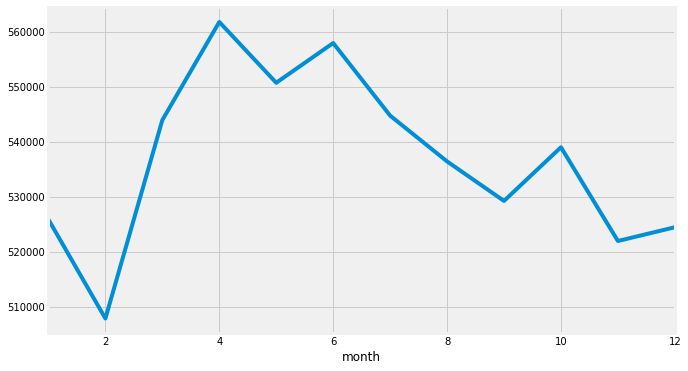

In [33]:
plt.figure(figsize=(10,6))
housedata.groupby("month").mean()["price"].plot()

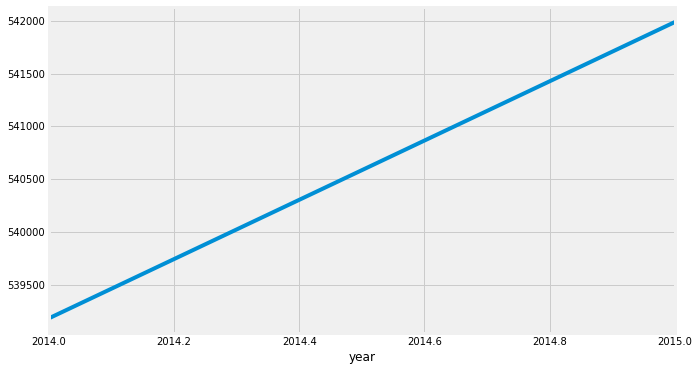

In [34]:
plt.figure(figsize=(10,6))
housedata.groupby("year").mean()["price"].plot()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
x=housedata.drop(["price","date"],axis=1).values
y=housedata["price"].values

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [38]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [39]:
model=Sequential()

 RELU :- Stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network.

Equation :- A(x) = max(0,x). It gives an output x if x is positive and 0 otherwise.

In [40]:
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))

model.add(Dense(1))

In [41]:
model.compile(optimizer="adam",loss="mse")

In [42]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         batch_size=130,epochs=550,verbose=1)

Train on 16209 samples, validate on 5404 samples
Epoch 1/550
16209/16209 [==============================] - 0s 24us/sample - loss: 431334763793.2310 - val_loss: 411636928860.6603
Epoch 2/550
16209/16209 [==============================] - 0s 10us/sample - loss: 428827669608.3016 - val_loss: 402831188762.3390
Epoch 3/550
16209/16209 [==============================] - 0s 10us/sample - loss: 391353838072.7665 - val_loss: 319711285548.1510
Epoch 4/550
16209/16209 [==============================] - 0s 10us/sample - loss: 240151136536.8751 - val_loss: 130861776588.2694
Epoch 5/550
16209/16209 [==============================] - 0s 10us/sample - loss: 97106074878.7839 - val_loss: 74866713114.1495
Epoch 6/550
16209/16209 [==============================] - 0s 12us/sample - loss: 72958626582.5692 - val_loss: 66522022389.7676
Epoch 7/550
16209/16209 [==============================] - 0s 12us/sample - loss: 66108300272.3958 - val_loss: 61716336291.3397
Epoch 8/550
16209/16209 [======================

16209/16209 [==============================] - 0s 11us/sample - loss: 32536443748.0215 - val_loss: 29675605156.4767
Epoch 65/550
16209/16209 [==============================] - 0s 10us/sample - loss: 32391147553.1036 - val_loss: 29536658891.7010
Epoch 66/550
16209/16209 [==============================] - 0s 11us/sample - loss: 32368950906.0853 - val_loss: 29665256200.1480
Epoch 67/550
16209/16209 [==============================] - 0s 11us/sample - loss: 32288284551.2098 - val_loss: 29559156788.6780
Epoch 68/550
16209/16209 [==============================] - 0s 10us/sample - loss: 32257316776.6925 - val_loss: 29603539973.3057
Epoch 69/550
16209/16209 [==============================] - 0s 11us/sample - loss: 32213252743.4151 - val_loss: 29483899435.2036
Epoch 70/550
16209/16209 [==============================] - 0s 11us/sample - loss: 32279631370.5186 - val_loss: 29367127154.4515
Epoch 71/550
16209/16209 [==============================] - 0s 10us/sample - loss: 32077870966.9107 - val_loss

16209/16209 [==============================] - 0s 12us/sample - loss: 29809447875.7944 - val_loss: 27667901911.4493
Epoch 128/550
16209/16209 [==============================] - 0s 13us/sample - loss: 29730244869.5436 - val_loss: 27524905608.4323
Epoch 129/550
16209/16209 [==============================] - 0s 13us/sample - loss: 29707857920.2527 - val_loss: 27567281294.1170
Epoch 130/550
16209/16209 [==============================] - 0s 12us/sample - loss: 29662473691.5166 - val_loss: 27553708379.1443
Epoch 131/550
16209/16209 [==============================] - 0s 12us/sample - loss: 29594426499.8458 - val_loss: 27505703707.4759
Epoch 132/550
16209/16209 [==============================] - 0s 12us/sample - loss: 29627067365.6561 - val_loss: 27484585417.8061
Epoch 133/550
16209/16209 [==============================] - 0s 12us/sample - loss: 29565163751.7251 - val_loss: 27572619654.3479
Epoch 134/550
16209/16209 [==============================] - 0s 12us/sample - loss: 29502877550.6980 - v

16209/16209 [==============================] - 0s 11us/sample - loss: 28121953947.1888 - val_loss: 26784653197.1695
Epoch 191/550
16209/16209 [==============================] - 0s 10us/sample - loss: 28088831282.0818 - val_loss: 26888170687.7631
Epoch 192/550
16209/16209 [==============================] - 0s 10us/sample - loss: 28040501999.6535 - val_loss: 26796971324.8260
Epoch 193/550
16209/16209 [==============================] - 0s 10us/sample - loss: 28028440269.8550 - val_loss: 26748035613.5603
Epoch 194/550
16209/16209 [==============================] - 0s 10us/sample - loss: 28057711553.7728 - val_loss: 26743552330.4693
Epoch 195/550
16209/16209 [==============================] - 0s 10us/sample - loss: 27988707371.8433 - val_loss: 26790635045.1399
Epoch 196/550
16209/16209 [==============================] - 0s 10us/sample - loss: 28044036550.8584 - val_loss: 26760012150.0518
Epoch 197/550
16209/16209 [==============================] - 0s 10us/sample - loss: 27959781077.1201 - v

16209/16209 [==============================] - 0s 12us/sample - loss: 27312335414.5514 - val_loss: 26403089675.1799
Epoch 254/550
16209/16209 [==============================] - 0s 13us/sample - loss: 27292996097.7373 - val_loss: 26396358261.4833
Epoch 255/550
16209/16209 [==============================] - 0s 12us/sample - loss: 27242500784.9841 - val_loss: 26429008576.1421
Epoch 256/550
16209/16209 [==============================] - 0s 13us/sample - loss: 27202997004.5876 - val_loss: 26712014968.5152
Epoch 257/550
16209/16209 [==============================] - 0s 12us/sample - loss: 27209745978.9105 - val_loss: 26412138558.5315
Epoch 258/550
16209/16209 [==============================] - 0s 12us/sample - loss: 27207542743.6945 - val_loss: 26383417603.9793
Epoch 259/550
16209/16209 [==============================] - 0s 13us/sample - loss: 27175603451.7515 - val_loss: 26412794356.2517
Epoch 260/550
16209/16209 [==============================] - 0s 13us/sample - loss: 27223092899.9701 - v

16209/16209 [==============================] - 0s 12us/sample - loss: 26545212717.4069 - val_loss: 26180345073.4093
Epoch 317/550
16209/16209 [==============================] - 0s 12us/sample - loss: 26504069083.7377 - val_loss: 26192314900.4648
Epoch 318/550
16209/16209 [==============================] - 0s 11us/sample - loss: 26475220816.6900 - val_loss: 26217250702.3064
Epoch 319/550
16209/16209 [==============================] - 0s 12us/sample - loss: 26422942115.7332 - val_loss: 26216334080.9474
Epoch 320/550
16209/16209 [==============================] - 0s 13us/sample - loss: 26438174489.5384 - val_loss: 26182448419.8135
Epoch 321/550
16209/16209 [==============================] - 0s 13us/sample - loss: 26465200492.9607 - val_loss: 26219199461.4715
Epoch 322/550
16209/16209 [==============================] - 0s 13us/sample - loss: 26399667453.7731 - val_loss: 26212281329.5988
Epoch 323/550
16209/16209 [==============================] - 0s 13us/sample - loss: 26449358437.4903 - v

16209/16209 [==============================] - 0s 15us/sample - loss: 25909391665.2605 - val_loss: 26224319326.9341
Epoch 380/550
16209/16209 [==============================] - 0s 14us/sample - loss: 25874775952.4333 - val_loss: 26198636732.3523
Epoch 381/550
16209/16209 [==============================] - 0s 13us/sample - loss: 25865448307.9415 - val_loss: 26155811517.4893
Epoch 382/550
16209/16209 [==============================] - 0s 12us/sample - loss: 25961635612.1917 - val_loss: 26170321108.6070
Epoch 383/550
16209/16209 [==============================] - 0s 12us/sample - loss: 25901145205.5051 - val_loss: 26204322362.3627
Epoch 384/550
16209/16209 [==============================] - 0s 12us/sample - loss: 25901352252.3161 - val_loss: 26227779524.1214
Epoch 385/550
16209/16209 [==============================] - 0s 12us/sample - loss: 25829407631.9911 - val_loss: 26493105015.9467
Epoch 386/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25837498674.6504 - v

16209/16209 [==============================] - 0s 11us/sample - loss: 25605268266.9115 - val_loss: 26170957327.9171
Epoch 443/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25622153420.5599 - val_loss: 26274137180.8497
Epoch 444/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25571655906.1657 - val_loss: 26177868138.6825
Epoch 445/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25647152220.6774 - val_loss: 26173000004.7846
Epoch 446/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25608582241.8577 - val_loss: 26190957540.7136
Epoch 447/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25578708786.4293 - val_loss: 26239121988.5951
Epoch 448/550
16209/16209 [==============================] - 0s 10us/sample - loss: 25596294683.3231 - val_loss: 26206543270.5611
Epoch 449/550
16209/16209 [==============================] - 0s 10us/sample - loss: 25601304519.0163 - v

16209/16209 [==============================] - 0s 12us/sample - loss: 25407819593.0458 - val_loss: 26237392713.7113
Epoch 506/550
16209/16209 [==============================] - 0s 13us/sample - loss: 25397072827.3290 - val_loss: 26254122118.9164
Epoch 507/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25408213851.3033 - val_loss: 26219800745.7824
Epoch 508/550
16209/16209 [==============================] - 0s 13us/sample - loss: 25405714772.0067 - val_loss: 26232519144.8823
Epoch 509/550
16209/16209 [==============================] - 0s 13us/sample - loss: 25370063613.2993 - val_loss: 26354296092.2339
Epoch 510/550
16209/16209 [==============================] - 0s 12us/sample - loss: 25426723907.9129 - val_loss: 26228790627.4819
Epoch 511/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25405336000.5409 - val_loss: 26295847915.5352
Epoch 512/550
16209/16209 [==============================] - 0s 11us/sample - loss: 25384051470.9882 - v

In [43]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,4.313348e+11,4.116369e+11
1,4.288277e+11,4.028312e+11
2,3.913538e+11,3.197113e+11
3,2.401511e+11,1.308618e+11
4,9.710607e+10,7.486671e+10


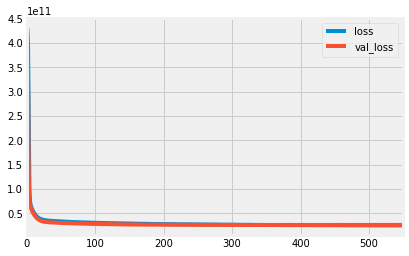

In [44]:
loss.plot()
#if both lines are coincide then our model is not overfitting
#if we get spikes in our plot then our model is overfitting

In [45]:
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [47]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,2.624404e+10,162000.116455,99056.910836,0.783777


In [48]:
print(error["mean_absolute_error"],housedata.describe()["price"]["mean"])

0    99056.910836
Name: mean_absolute_error, dtype: float64 540088.1417665294


In [49]:
sample_house=housedata.drop(["price","date"],axis=1).iloc[0].values
sample_house=sample_house.reshape(-1,19)

In [50]:
sample_house=scalar.transform(sample_house)

In [51]:
sample_predict=model.predict(sample_house)
print(sample_predict,housedata.iloc[0:1,1:2].values)

[[256915.55]] [[221900.]]


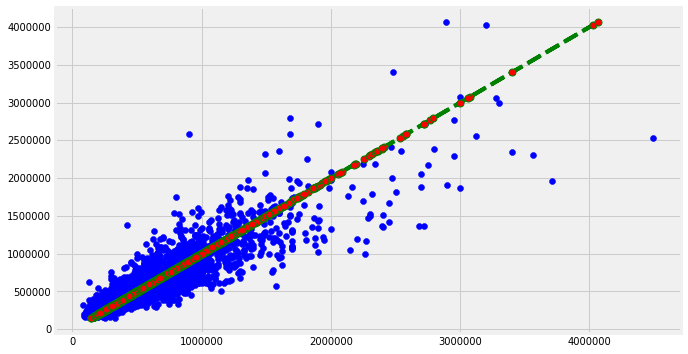

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color="blue",marker="o")
plt.plot(y_pred,y_pred,marker='o',
         color='green',markerfacecolor='red',
         markersize=7,linestyle='dashed')